# Create a tmask that removes al the Arctic basin that will be used by the cdfcofdis to avoid any SSS damping

In [1]:
# Select the PANGEO kernel to be able to use this Notebook
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib as mpl
from matplotlib import rcParams
from mpl_toolkits.basemap import Basemap
import hvplot.xarray 

%matplotlib inline

>> ## Data read 

In [2]:
# Read de Domain config file
#INDIR='/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/FREDY/CONFIGS/CREG12.L75/GRID/'
INDIR='/data0/project/drakkar/CONFIGS/CREG12.L75/GRID/'
ds_dfg=xr.open_dataset(INDIR+'CREG12.L75-REF09_domain_cfg_20230810_Z.nc')

In [3]:
ds_dfg

<xarray.Dataset>
Dimensions:       (t: 1, y: 1801, x: 1580, z: 75, nlines: 114)
Dimensions without coordinates: t, y, x, z, nlines
Data variables: (12/43)
    bathy_meter   (t, y, x) float32 ...
    bottom_level  (t, y, x) int32 ...
    e1f           (t, y, x) float64 ...
    e1t           (t, y, x) float64 ...
    e1u           (t, y, x) float64 ...
    e1v           (t, y, x) float64 ...
    ...            ...
    namelist_cfg  (nlines) |S115 ...
    nav_lat       (y, x) float32 ...
    nav_lev       (z) float32 ...
    nav_lon       (y, x) float32 ...
    time_counter  (t) float32 ...
    top_level     (t, y, x) int32 ...
Attributes:
    DOMAIN_number_total:     1
    DOMAIN_number:           0
    DOMAIN_dimensions_ids:   [1 2]
    DOMAIN_size_global:      [1580 1801]
    DOMAIN_size_local:       [1580 1801]
    DOMAIN_position_first:   [1 1]
    DOMAIN_position_last:    [1580 1801]
    DOMAIN_halo_size_start:  [0 0]
    DOMAIN_halo_size_end:    [0 0]
    DOMAIN_type:             BOX
    NCO:                     netCDF Operators version 5.0.1 (Homepage = http:...
    history:                 Mon Aug 14 15:57:07 2023: ncrename -d time_count...

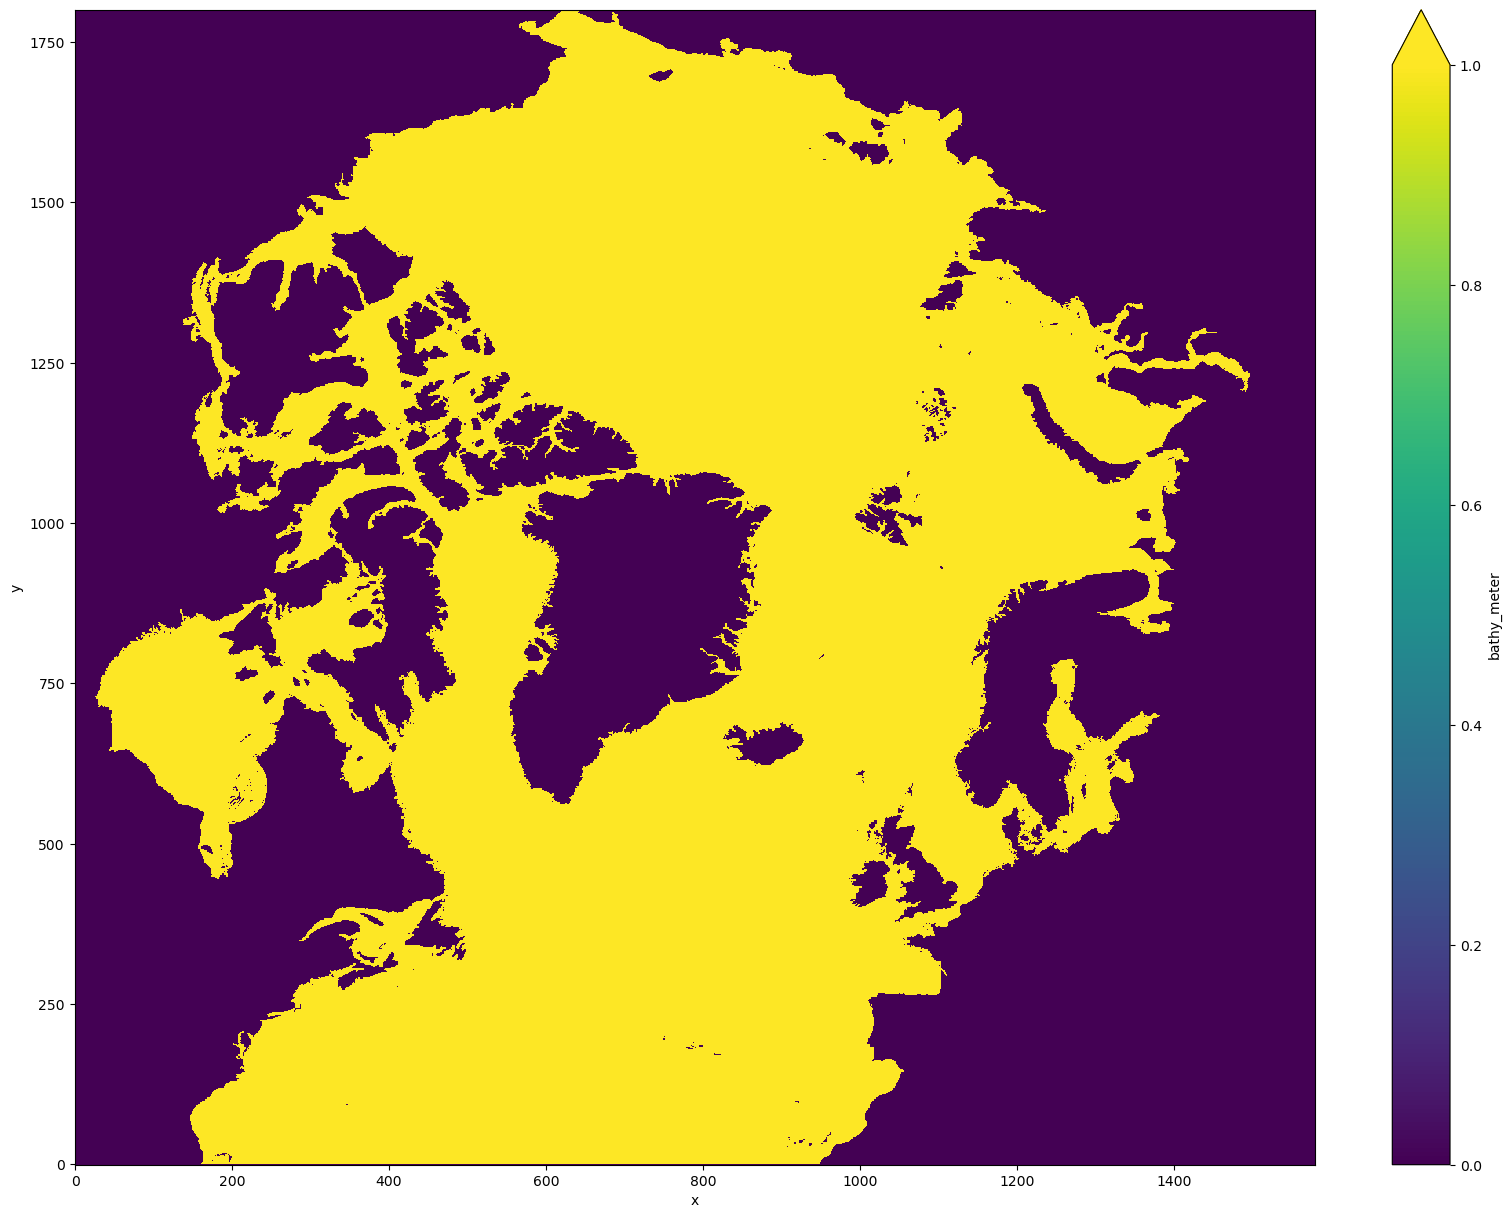

In [4]:
plt.figure(figsize=(20,15))

ds_dfg['bathy_meter'].plot(vmin=0.,vmax=1.)

In [5]:
ds_dfg['bathy_meter'][0,1060::,:]=0.

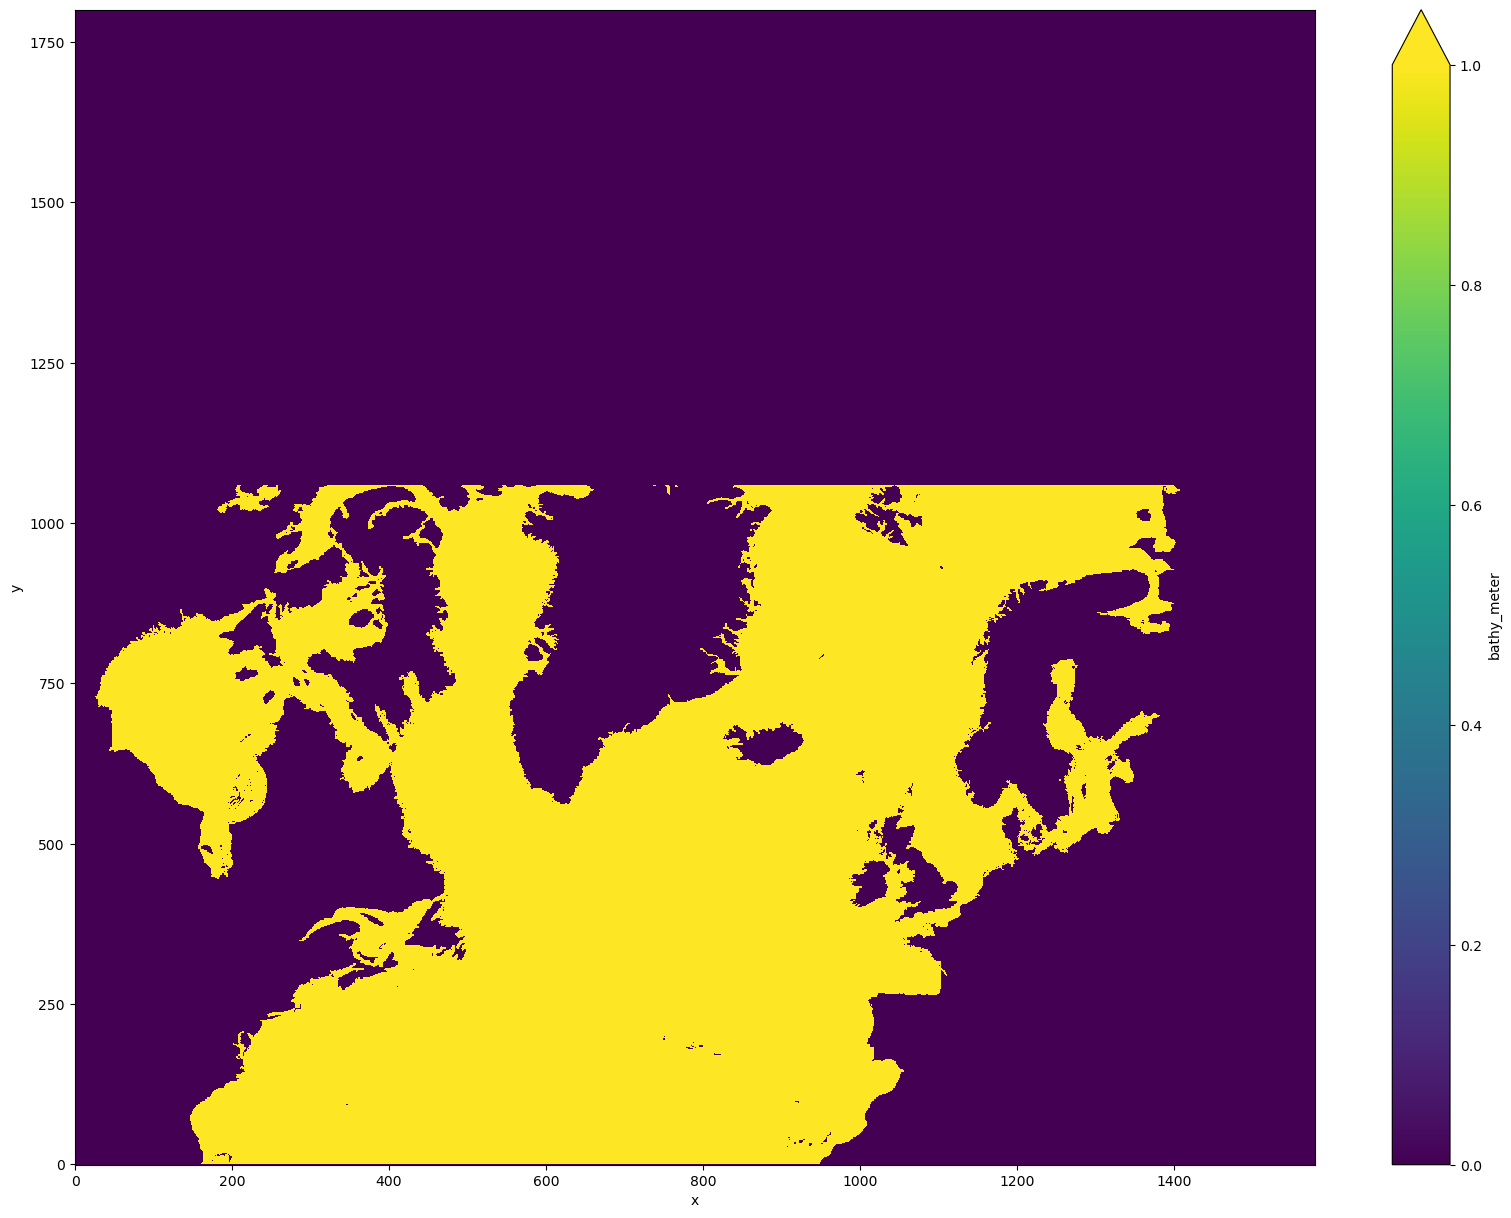

In [6]:
plt.figure(figsize=(20,15))

ds_dfg['bathy_meter'].plot(vmin=0.,vmax=1.)

In [7]:
ds_dfg['bathy_meter'][0,980:1080,1020::]=0.

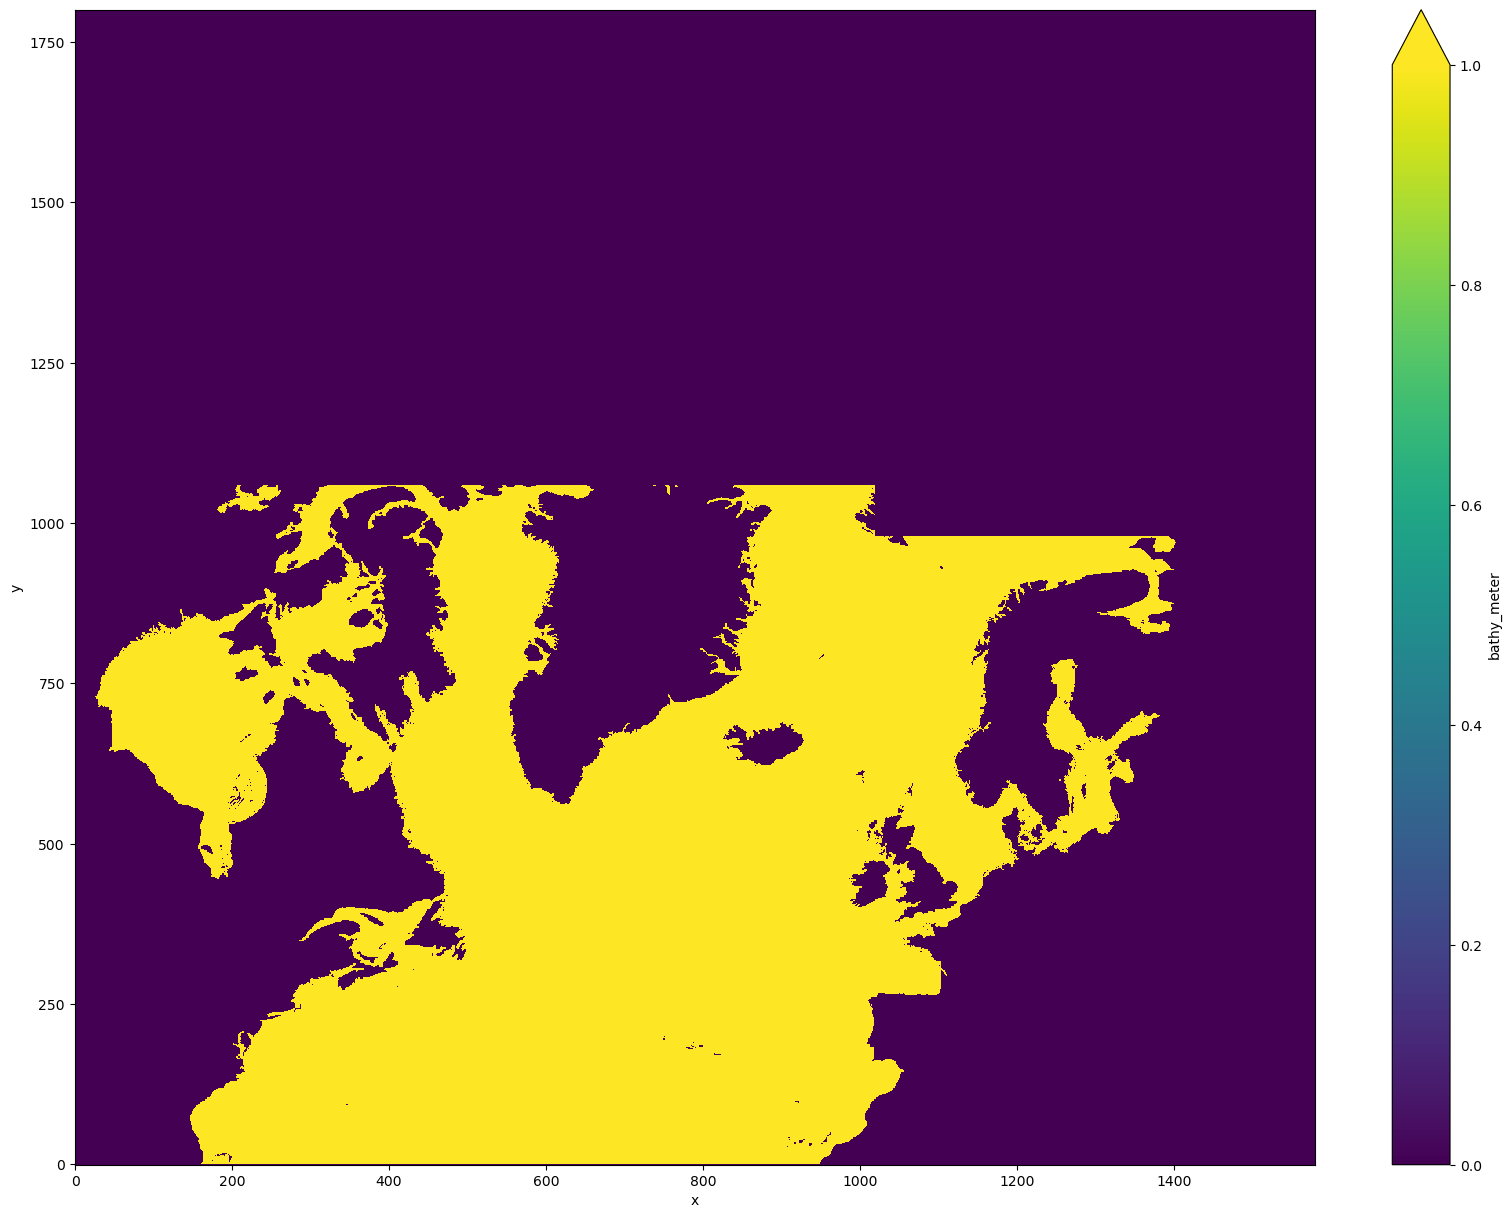

In [8]:
plt.figure(figsize=(20,15))

ds_dfg['bathy_meter'].plot(vmin=0.,vmax=1.)

In [9]:
ds_dfg['bathy_meter'][0,930:980,1070::]=0.

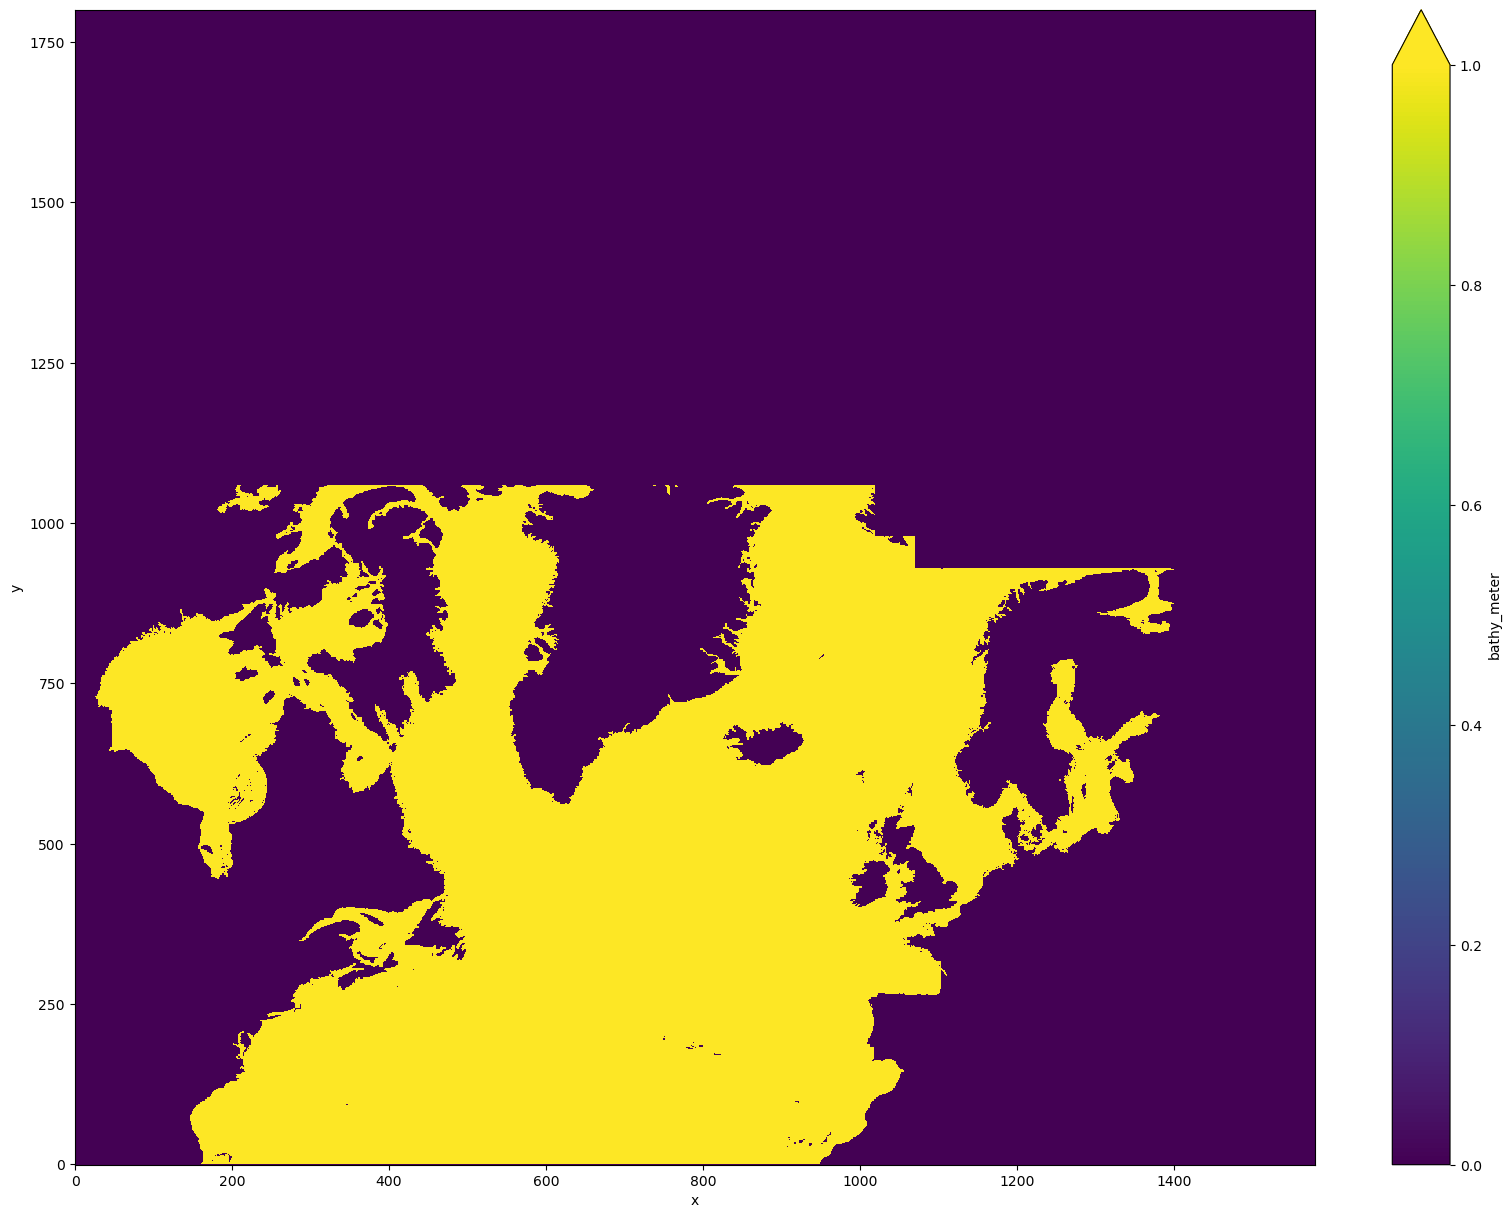

In [10]:
plt.figure(figsize=(20,15))

ds_dfg['bathy_meter'].plot(vmin=0.,vmax=1.)

In [11]:
ds_dfg['bathy_meter'][0,880:930,1130::]=0.
ds_dfg['bathy_meter'][0,830:880,1230::]=0.
ds_dfg['bathy_meter'][0,780:830,1330::]=0.
ds_dfg['bathy_meter'][0,730:780,1430::]=0.

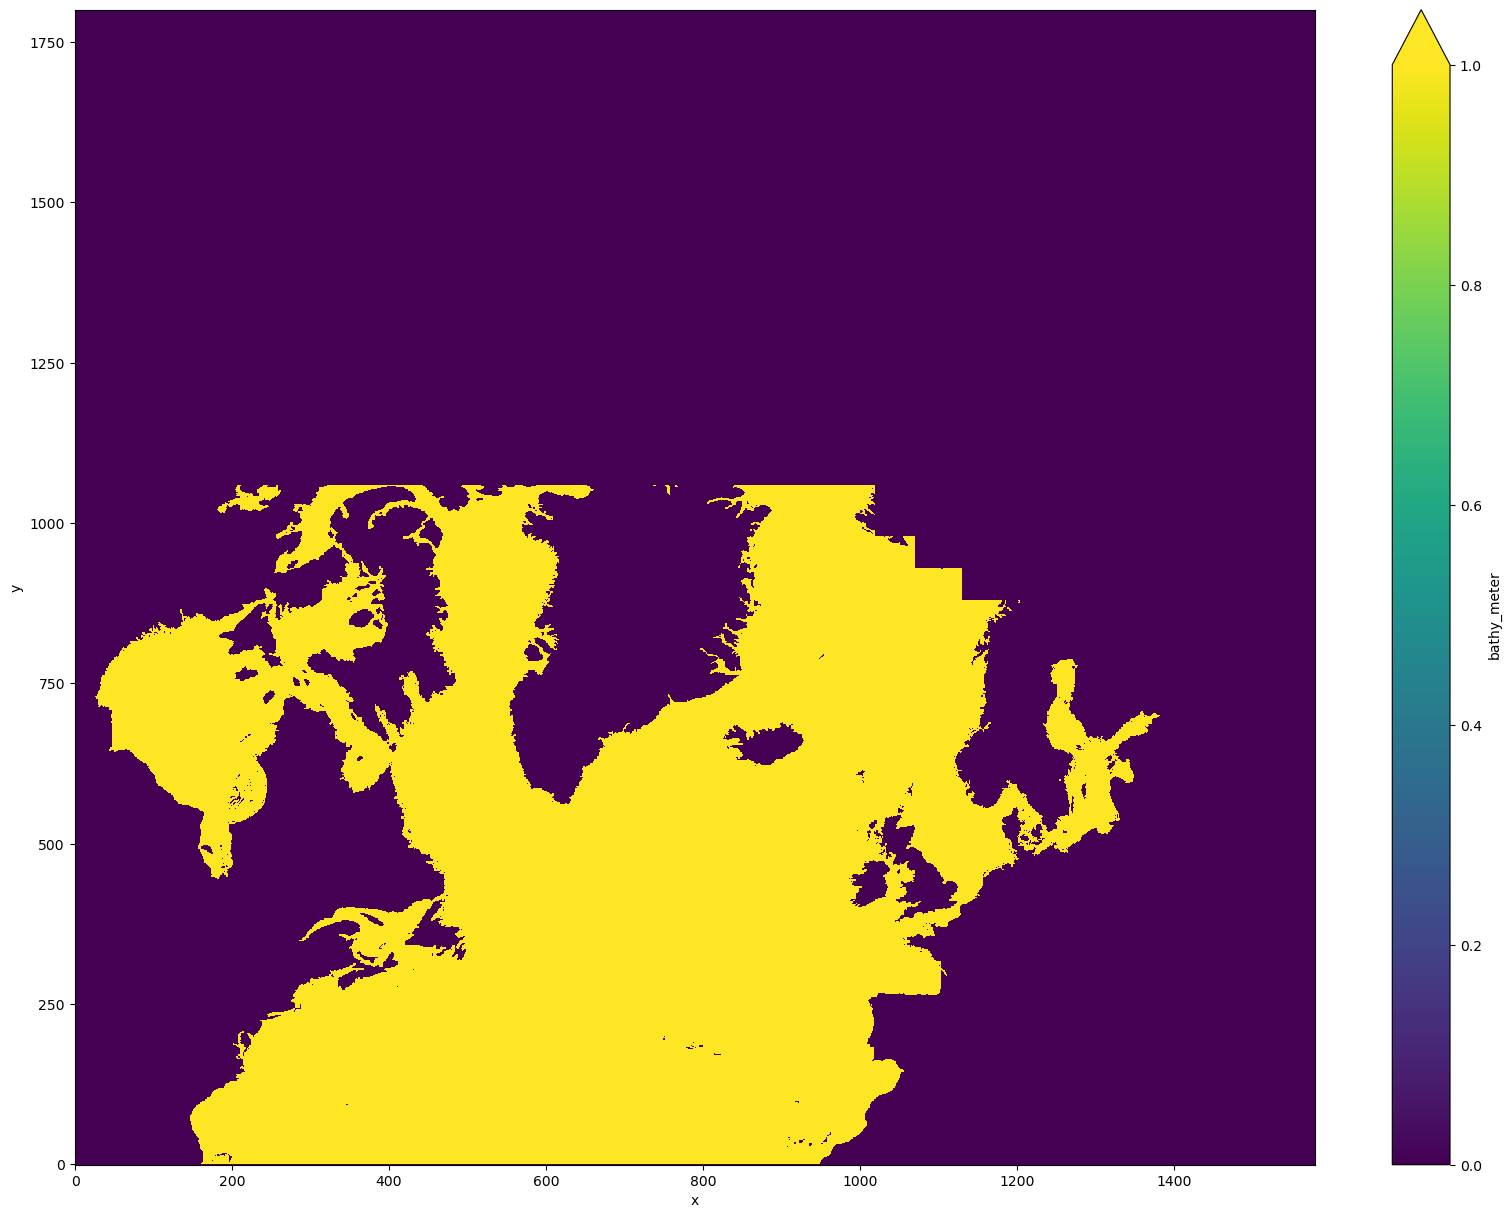

In [12]:
plt.figure(figsize=(20,15))

ds_dfg['bathy_meter'].plot(vmin=0.,vmax=1.)

In [13]:
ds_dfg['tmask']=xr.where(ds_dfg['bathy_meter'][0,:,:] > 0., 1., 0.)

In [14]:
tmask=xr.where(ds_dfg['bathy_meter'][0,:,:] > 0., 1., 0.)

In [15]:
ds_dfg

<xarray.Dataset>
Dimensions:       (t: 1, y: 1801, x: 1580, z: 75, nlines: 114)
Dimensions without coordinates: t, y, x, z, nlines
Data variables: (12/44)
    bathy_meter   (t, y, x) float32 ...
    bottom_level  (t, y, x) int32 ...
    e1f           (t, y, x) float64 ...
    e1t           (t, y, x) float64 ...
    e1u           (t, y, x) float64 ...
    e1v           (t, y, x) float64 ...
    ...            ...
    nav_lat       (y, x) float32 ...
    nav_lev       (z) float32 ...
    nav_lon       (y, x) float32 ...
    time_counter  (t) float32 ...
    top_level     (t, y, x) int32 ...
    tmask         (y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    DOMAIN_number_total:     1
    DOMAIN_number:           0
    DOMAIN_dimensions_ids:   [1 2]
    DOMAIN_size_global:      [1580 1801]
    DOMAIN_size_local:       [1580 1801]
    DOMAIN_position_first:   [1 1]
    DOMAIN_position_last:    [1580 1801]
    DOMAIN_halo_size_start:  [0 0]
    DOMAIN_halo_size_end:    [0 0]
    DOMAIN_type:             BOX
    NCO:                     netCDF Operators version 5.0.1 (Homepage = http:...
    history:                 Mon Aug 14 15:57:07 2023: ncrename -d time_count...

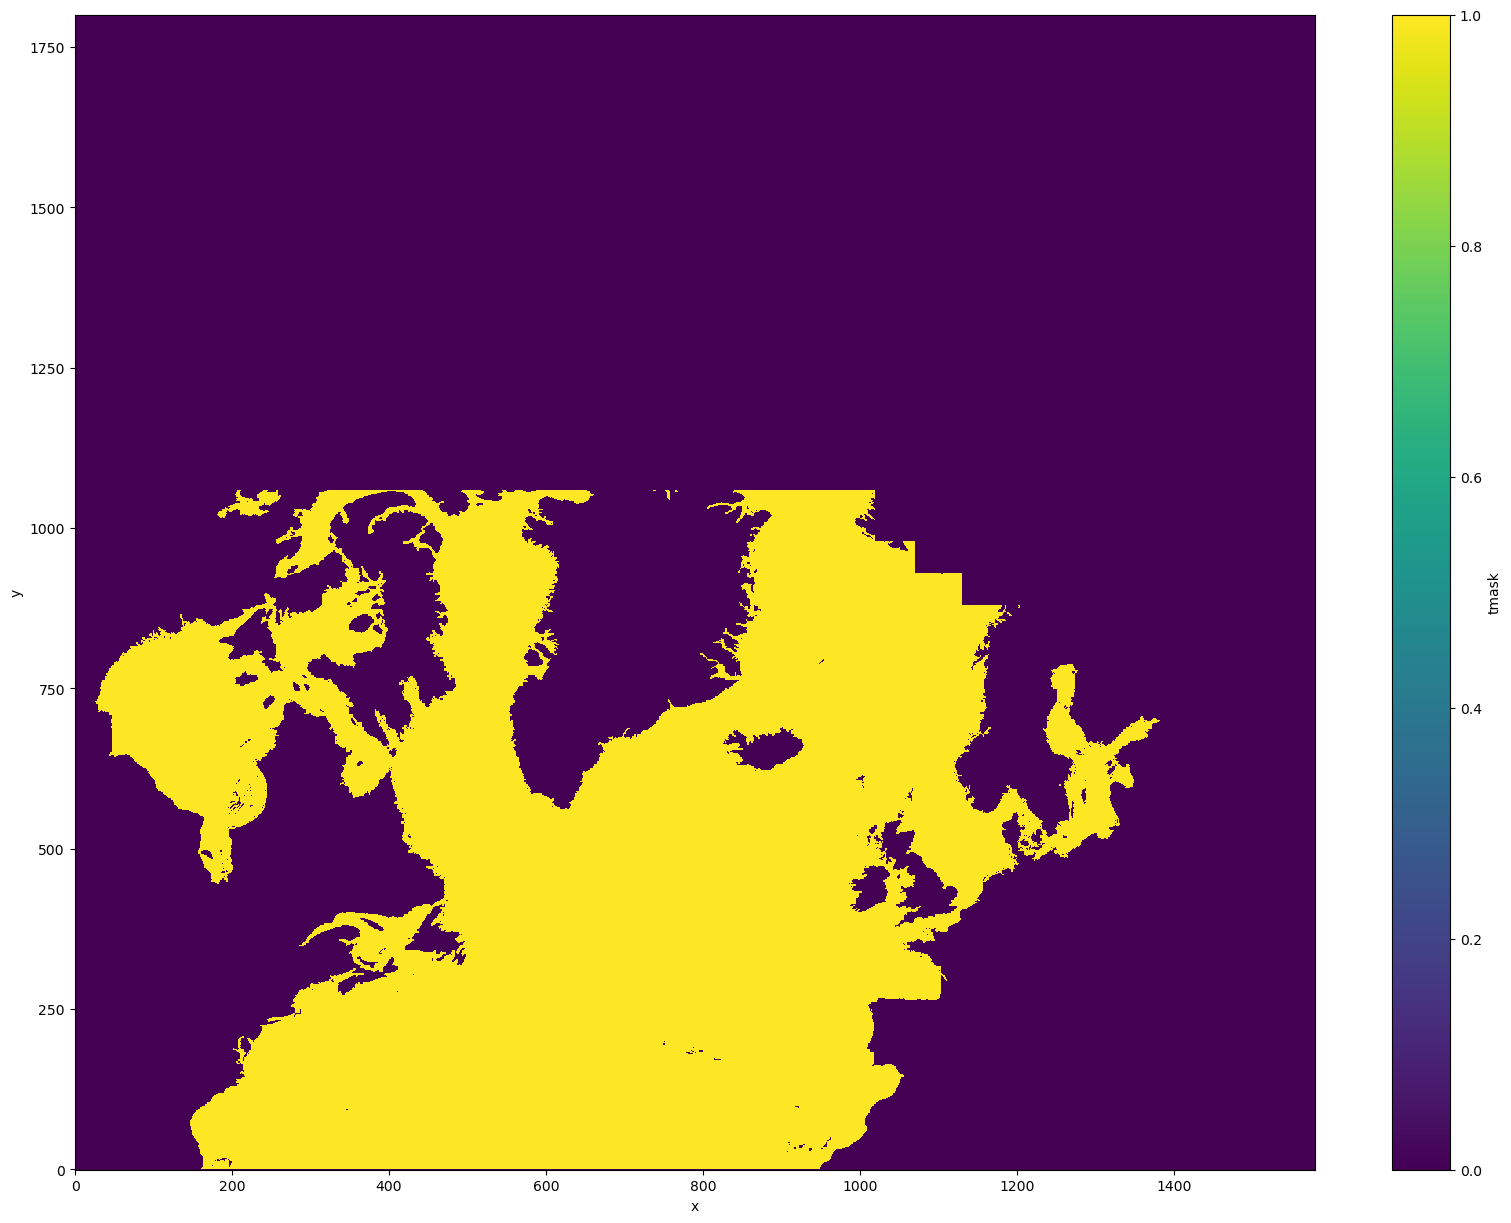

In [16]:
plt.figure(figsize=(20,15))

ds_dfg['tmask'].plot()

In [18]:
if False: 
    ds_out=xr.Dataset()  
    ds_out['tmask']= (('y','x'),ds_dfg['tmask'].copy())
    ds_out.coords['nav_lon']= (('y','x'),ds_dfg['nav_lon'].values)
    ds_out.coords['nav_lat']= (('y','x'),ds_dfg['nav_lat'].values)

    ds_out.attrs={'History':'This version relies on bathymetry file: CREG12.L75-REF09_domain_cfg_20230810_Z.nc',\
                 'Adds':'To use ONLY for computing distance to the coast a avoid SSS damping in Arctic'}

    ldate='20240426'
    if False: ds_out.to_netcdf(INDIR+'CREG12.L75_tmask4distcoast_REF11_'+ldate+'.nc')

# Control the calculation of the distance to the coast

In [19]:
# Read de Domain config file
#INDIR='/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/FREDY/CONFIGS/CREG12.L75/GRID/'
INDIR='/data0/project/drakkar/CONFIGS/CREG12.L75/GRID/'
ds_dcoast=xr.open_dataset(INDIR+'dist_coast_CREG12.L75-REF11.nc')

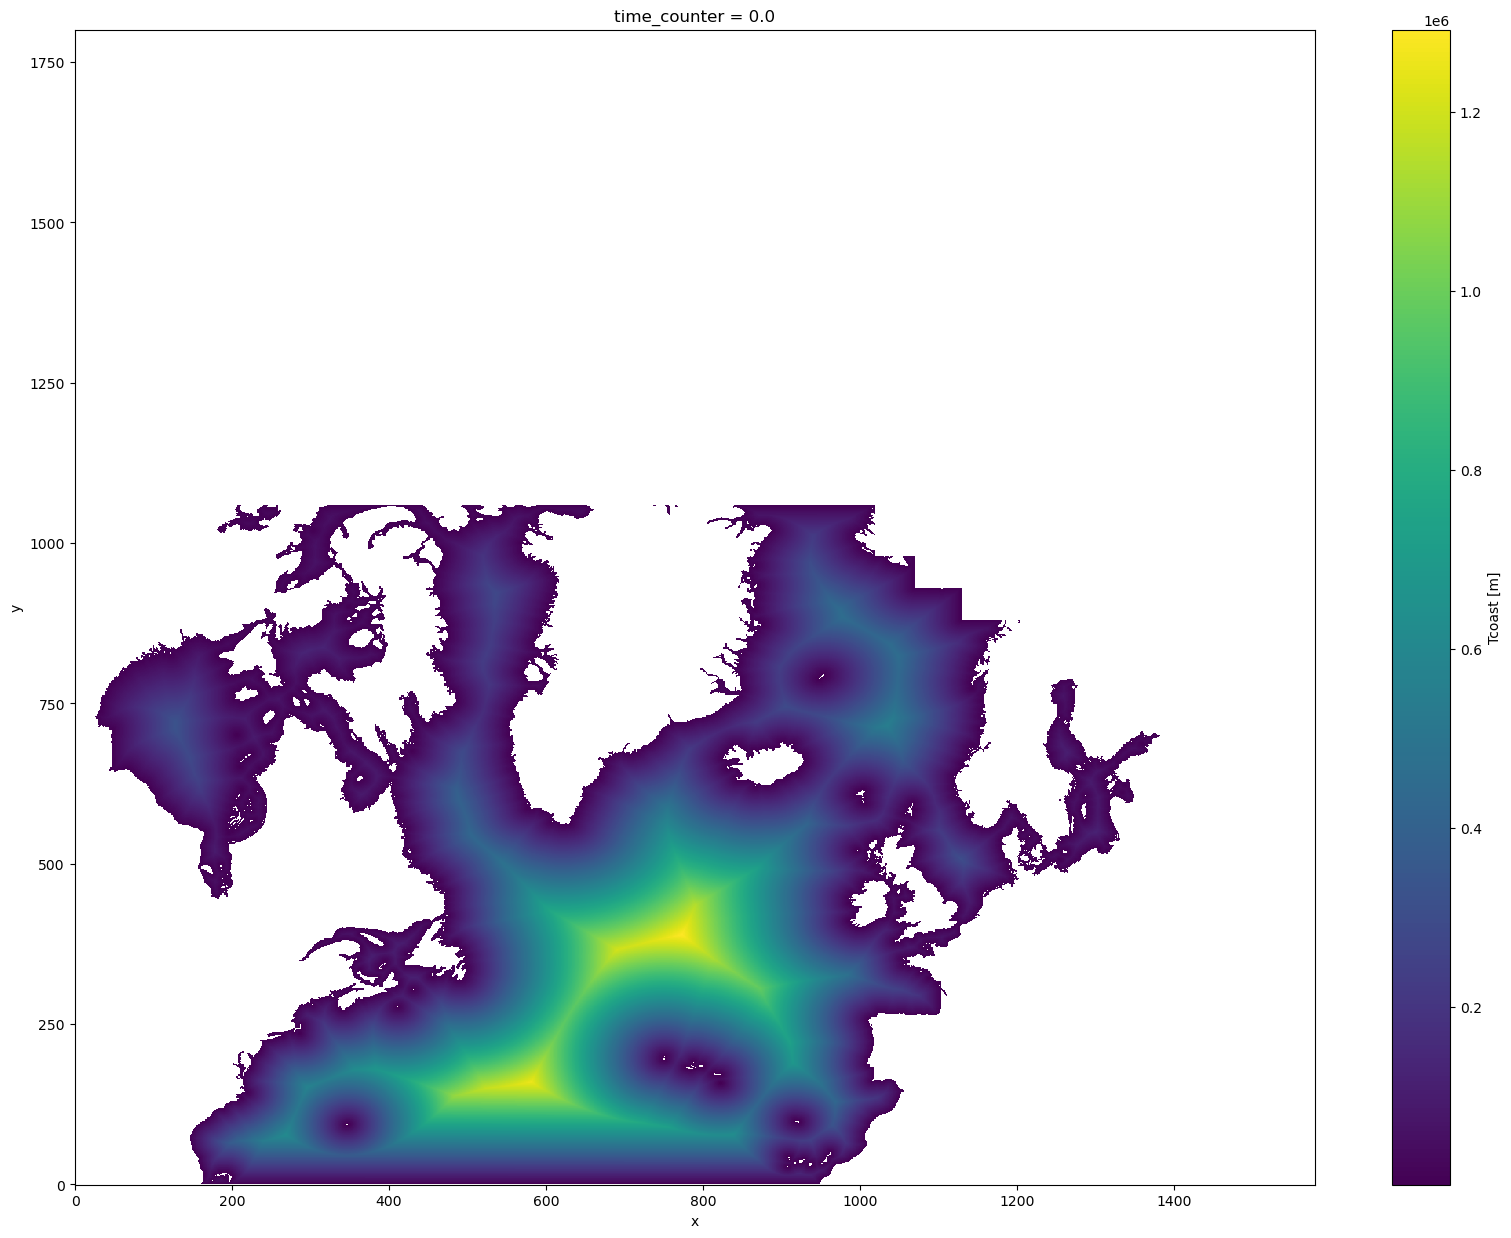

In [20]:
plt.figure(figsize=(20,15))

ds_dcoast['Tcoast'].plot()

In [21]:
ds_dcoast

<xarray.Dataset>
Dimensions:       (y: 1801, x: 1580, time_counter: 1)
Coordinates:
  * time_counter  (time_counter) float64 0.0
Dimensions without coordinates: y, x
Data variables:
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
    Tcoast        (time_counter, y, x) float32 ...
Attributes:
    start_date:        -1
    output_frequency:  N/A
    CONFIG:            N/A
    CASE:              N/A

In [22]:
rn_dist=150.
rn_dist=rn_dist*1000.  # tranform rn_dist to m


ds_dcoast['distcoast']=0.5*(np.tanh(3.*(ds_dcoast.Tcoast.isel(time_counter=0)*ds_dcoast.Tcoast.isel(time_counter=0)/rn_dist/rn_dist - 1 )) + 1 )

In [23]:
ds_dcoast

<xarray.Dataset>
Dimensions:       (y: 1801, x: 1580, time_counter: 1)
Coordinates:
  * time_counter  (time_counter) float64 0.0
Dimensions without coordinates: y, x
Data variables:
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
    Tcoast        (time_counter, y, x) float32 ...
    distcoast     (y, x) float32 nan nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    start_date:        -1
    output_frequency:  N/A
    CONFIG:            N/A
    CASE:              N/A

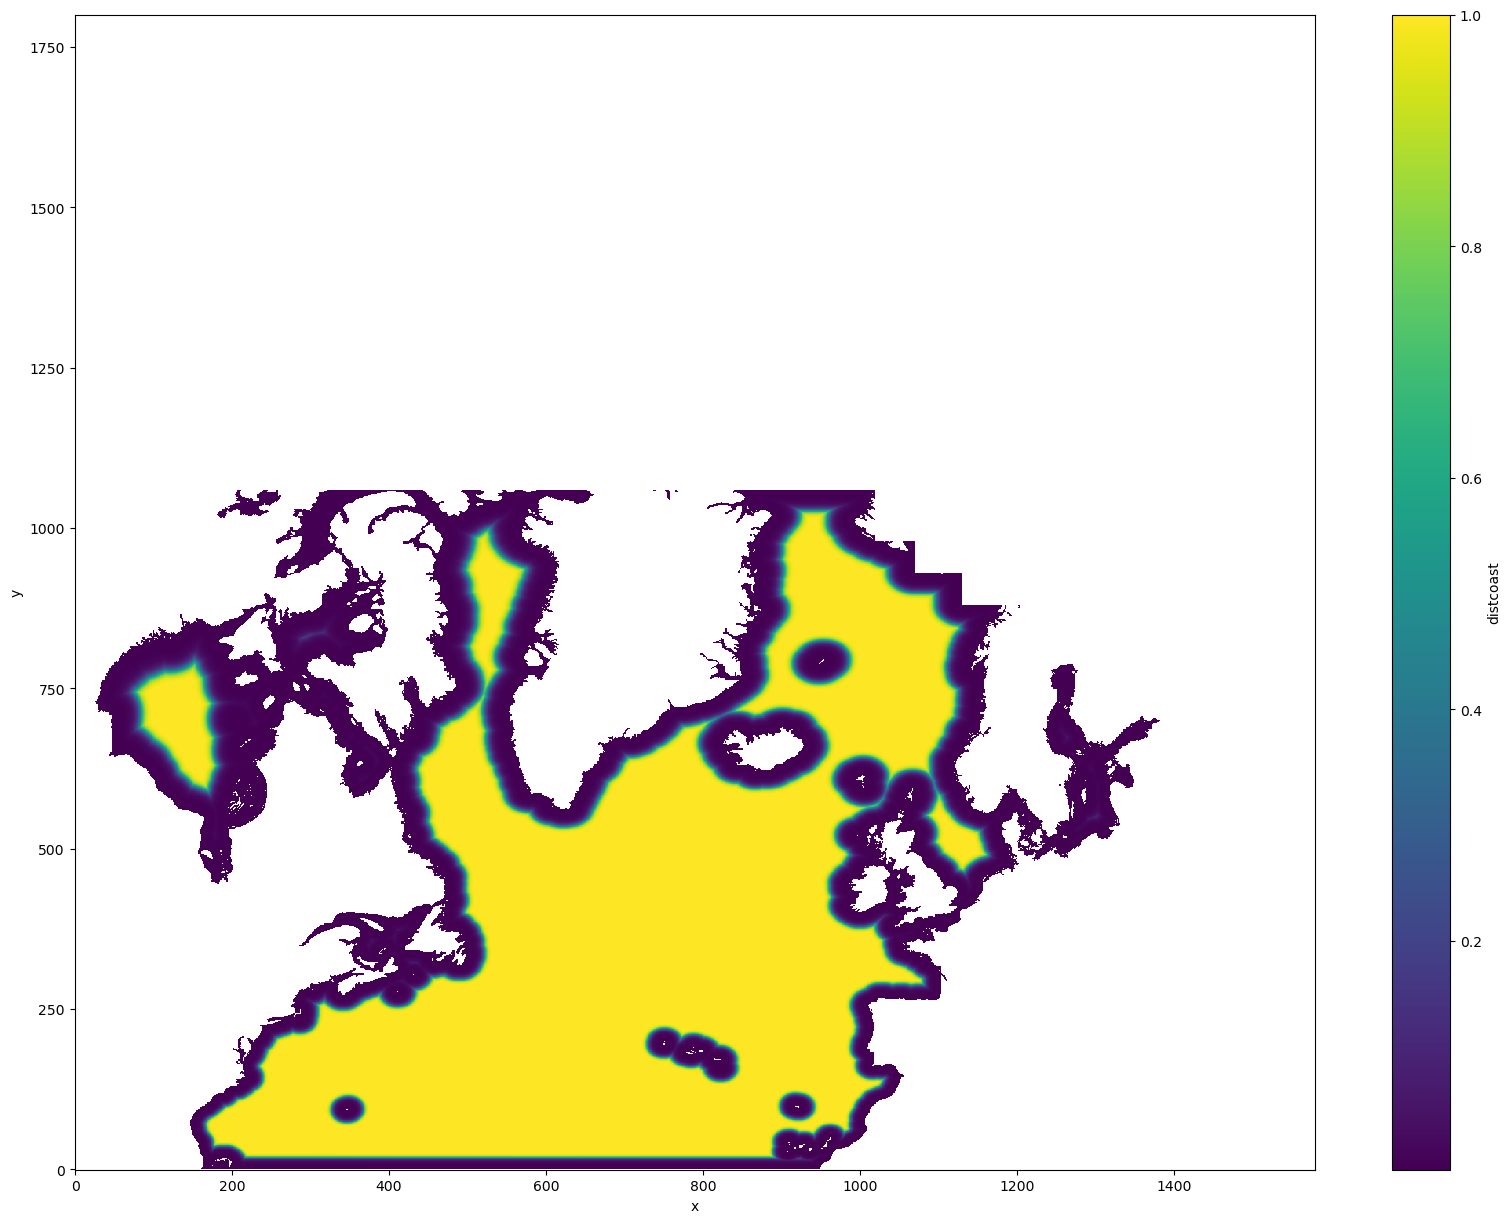

In [24]:
plt.figure(figsize=(20,15))

ds_dcoast['distcoast'].plot()

In [25]:
plt.figure(figsize=(20,15))

ds_dcoast['distcoast'].hvplot.quadmesh(rasterize=True,cmap='Spectral_r')

/opt/linux/envs/envs/phyocean-2023.11/lib/python3.10/site-packages/dask/dataframe/_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 11.0.0. Please consider upgrading.
  warnings.warn(


:DynamicMap   []
   :Image   [x,y]   (distcoast)

<Figure size 2000x1500 with 0 Axes>